# CS178 LAB 5 WINTER 2017
# KODY CHEUNG 85737824

### Problem 1A) Basics of clustering: Loading Iris data

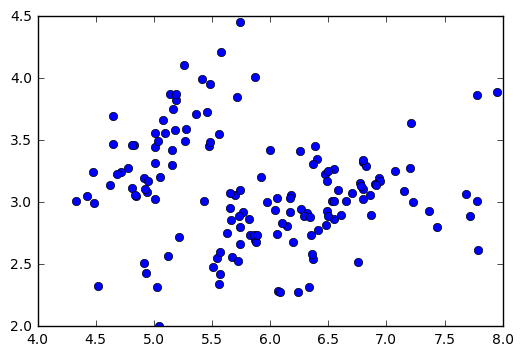

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("C:\Python35\CS178\Lab5\data\iris.txt",delimiter=None)

X = data[:,0:2]

plt.plot(X[:,0], X[:,1], 'o')
plt.show()

### Problem 1B) Basics of clustering: K-means

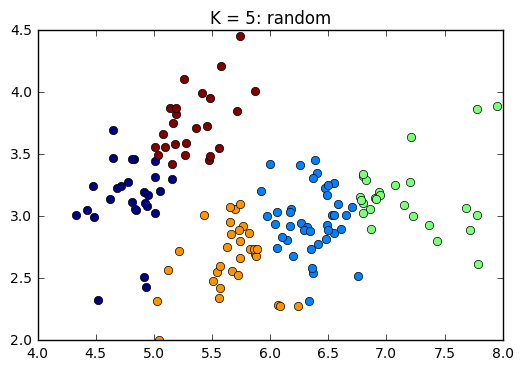

21.3288750436


C:\Python35\CS178\Lab5\mltools\cluster.py:118: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  clusters[0,:] = X[np.floor(np.random.rand() * m),:]			# take random point as first cluster


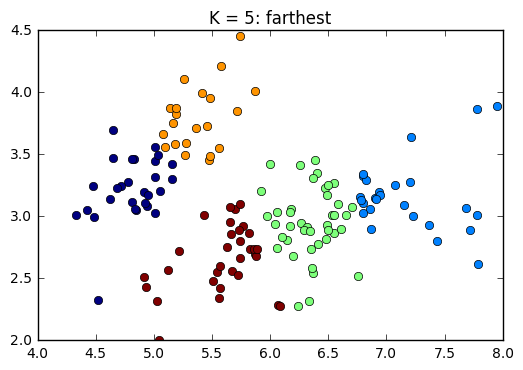

21.341435585


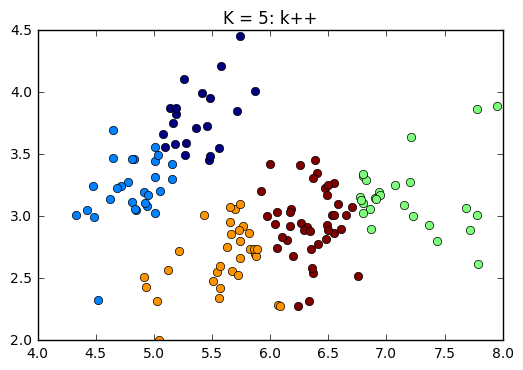

21.341435585


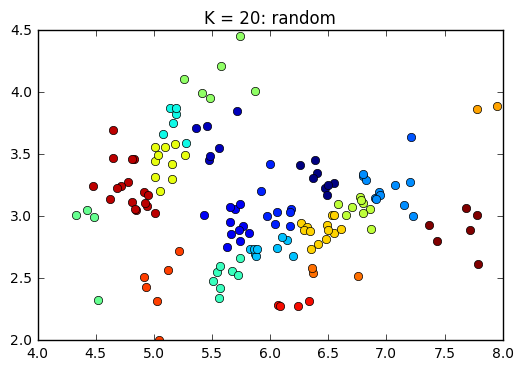

4.65541161813


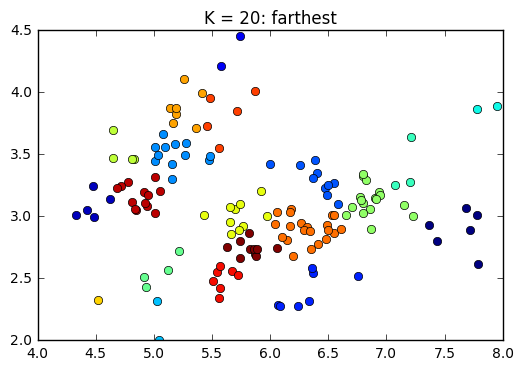

4.62260455495


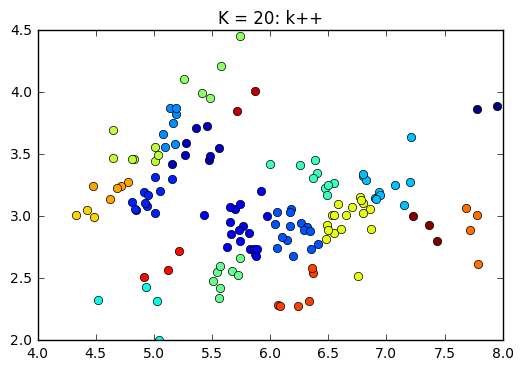

4.54837559628


In [23]:
kmeans_init = ['random', 'farthest', 'k++']

# k-mean with k = 5 and k = 20
for k in [5,20]:
    
    # different initializations
    for init in kmeans_init:
    
        clusters, centers, distance_sum = ml.cluster.kmeans(X, k, init)
        
        ml.plotClassify2D(None, X, clusters)
        
        plt.title("K = {}: {}".format(k, init))
        
        plt.show()
        
        print(distance_sum)


### Problem 1C) Basics of clustering: Agglomerative clustering

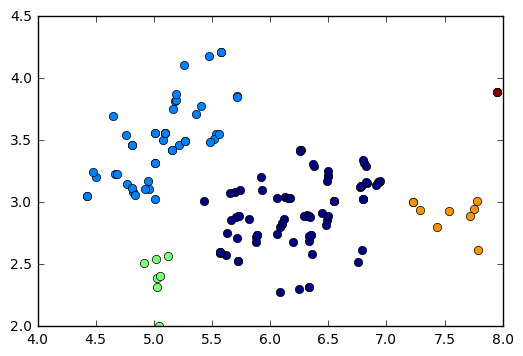

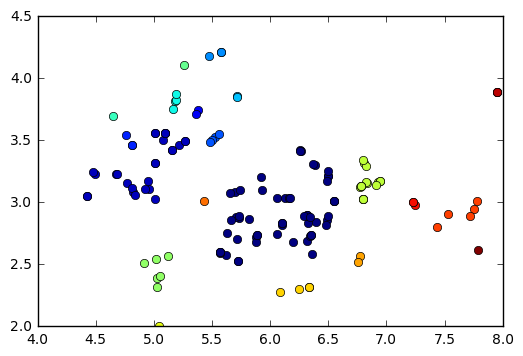

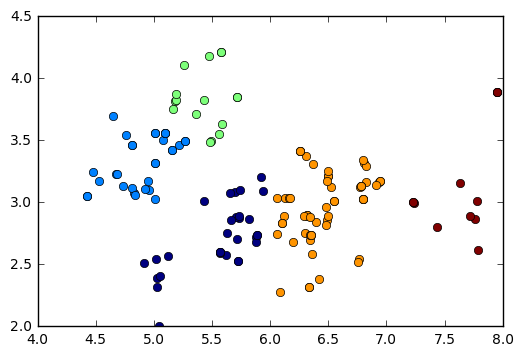

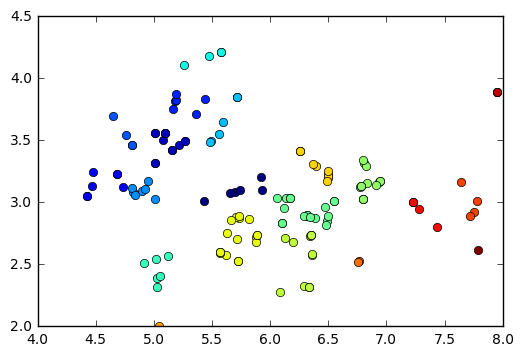

In [27]:
# Single linkage (minimum distance to center)

clusters, join = ml.cluster.agglomerative(X, 5, 'min')

ml.plotClassify2D(None, X, clusters)

plt.show()

clusters, join = ml.cluster.agglomerative(X, 20, 'min')

ml.plotClassify2D(None, X, clusters)

plt.show()


# Complete linkage (maximum distance to center)
clusters, join = ml.cluster.agglomerative(X, 5, 'max')

ml.plotClassify2D(None, X, clusters)

plt.show()

clusters, join = ml.cluster.agglomerative(X, 20, 'max')

ml.plotClassify2D(None, X, clusters)

plt.show()

Single linkage for k-means of 5 and 20 looks the most clear cut and reasonable, whereas the complete linkage creates tons of small and separate clusters, which may be better for larger data sets but not this one.

The agglomerative single linkage for k = 20 looks very much like kmeans for k = 5 and both complete linkage graphs resemble the random k = 20 kmeans graph.

### Problem 1D) Basics of clustering: EM Gaussian

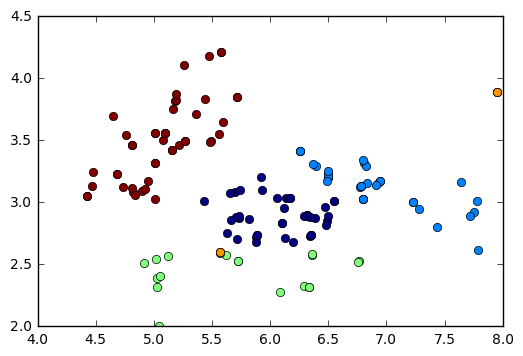

-150.288090353


C:\Python35\CS178\Lab5\mltools\cluster.py:118: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  clusters[0,:] = X[np.floor(np.random.rand() * m),:]			# take random point as first cluster


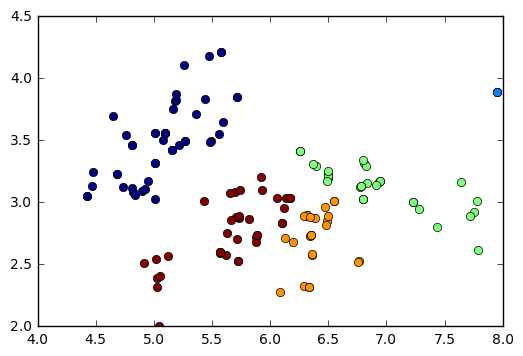

-111.411962017


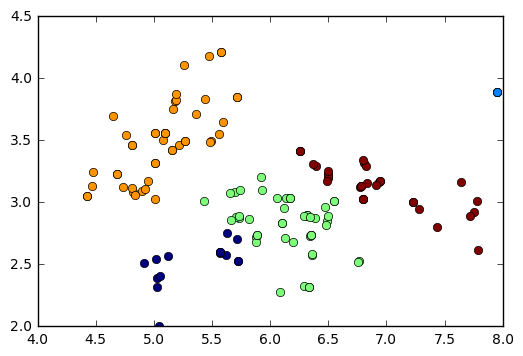

-113.196291244


In [33]:
clusters, parameters, soft, log_likelihood = ml.cluster.gmmEM(X, 5, 'random')

ml.plotClassify2D(None, X, clusters)

plt.show()

print(log_likelihood)


clusters, parameters, soft, log_likelihood = ml.cluster.gmmEM(X, 5, 'farthest')

ml.plotClassify2D(None, X, clusters)

plt.show()

print(log_likelihood)


clusters, parameters, soft, log_likelihood = ml.cluster.gmmEM(X, 5, 'k++')

ml.plotClassify2D(None, X, clusters)

plt.show()

print(log_likelihood)


### Problem 2A) Eigenfaces: zero-mean of face images

In [62]:
X = np.genfromtxt("data/faces.txt", delimiter = None)

# plt.figure()

# img = np.reshape(X[i,:], (24,24))

# plt.imshow( img.T, cmap="gray")

# plt.show()

# Subtract the mean of the face images from each picture
XZero = X - np.mean(X,axis = 0)


### Problem 2B) Eigenfaces: SVD of data

In [63]:
from scipy import linalg

# Singlar Value Decomposition
# decompose a matrix into Unitary left vectors, Singluar values diagonal, Unitary right vectors
U, S, Vh = linalg.svd(XZero, full_matrices = False)

# XZero = W * Vh
W = U.dot(np.diag(S))


### Problem 2C) Eigenfaces: MSE values

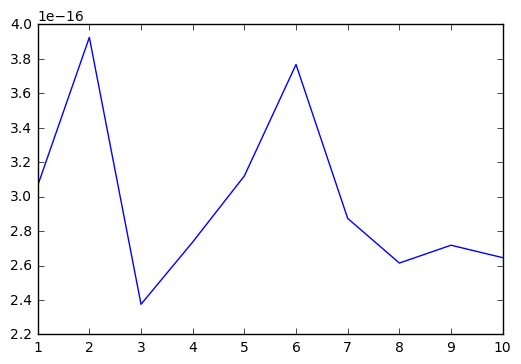

In [58]:
K = [1,2,3,4,5,6,7,8,9,10]

MSE = []

for k in K:
    #find first k eigendirections
    XzeroHat = W[:,:k].dot(Vh[:k,:])
    
    MSE.append(np.mean((XZero - XzeroHat)*2))
    
plt.plot(K, MSE)

plt.show()
    
    

### Problem 2D) Eigenfaces: First 3 principal directions

Principal direction #1


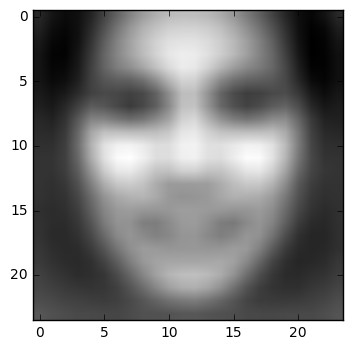

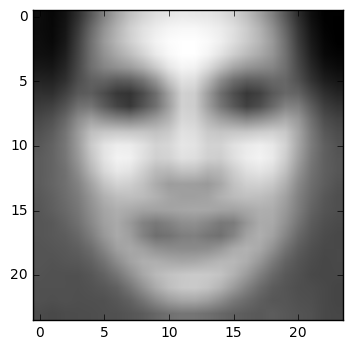

Principal direction #2


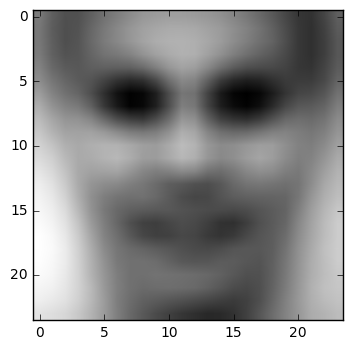

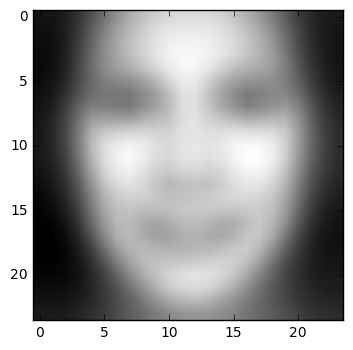

Principal direction #3


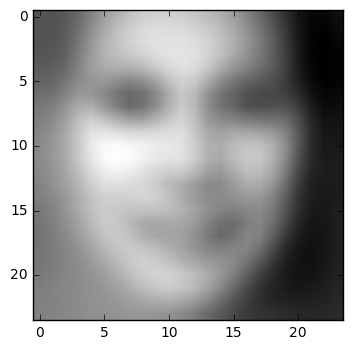

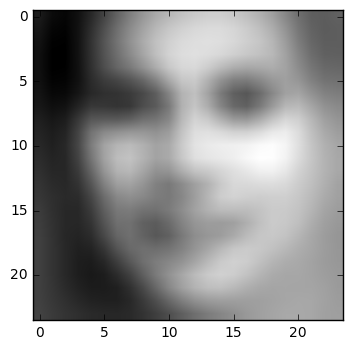

In [85]:
# mu + alpha V[i,:]
# mu - alpha V[i,:]

mu = np.mean(X,axis = 0)

for j in range(0,3):
    
    print("Principal direction #{}".format(j+1))
    
    alpha = 2 * np.median( np.abs(W[:,j]))
    
    image1 = np.reshape(mu + alpha * Vh[j,:], (24,24))
    
    image2 = np.reshape(mu - alpha * Vh[j,:], (24,24))
    
    plt.figure()

    plt.imshow( image1.T, cmap="gray")
    
    plt.show()

    plt.imshow( image2.T, cmap="gray")

    plt.show()
    





### Problem 2E) Eigenfaces: K principal directions

Principal direction #5


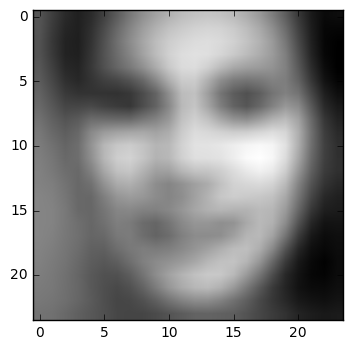

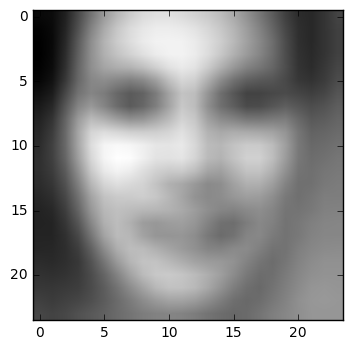

Principal direction #10


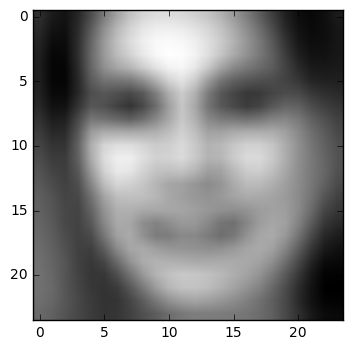

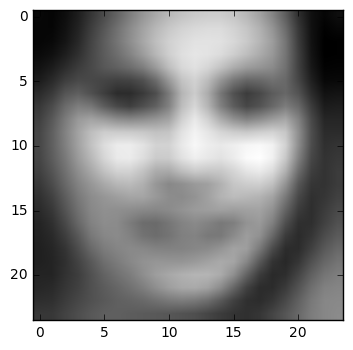

Principal direction #50


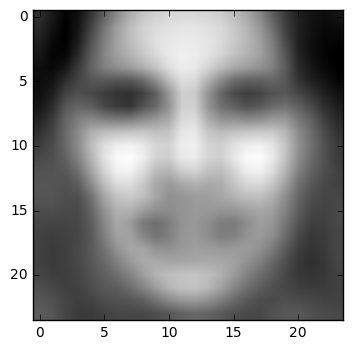

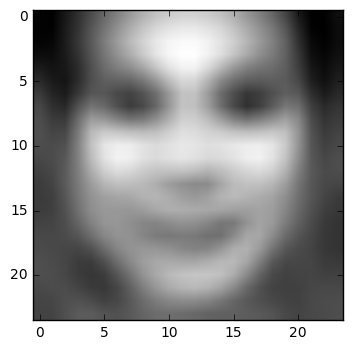

Principal direction #100


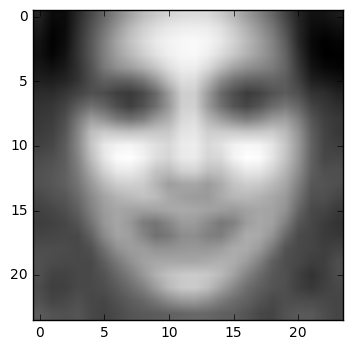

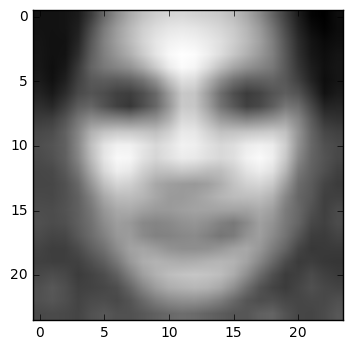

In [87]:
K = [5,10,50,100]

for k in K:
    
    print("Principal direction #{}".format(k))
    
    alpha = 2 * np.median( np.abs(W[:,k]))
    
    image1 = np.reshape(mu + alpha * Vh[k,:], (24,24))
    
    image2 = np.reshape(mu - alpha * Vh[k,:], (24,24))
    
    plt.figure()

    plt.imshow( image1.T, cmap="gray")
    
    plt.show()

    plt.imshow( image2.T, cmap="gray")

    plt.show()
    
    
    

### Problem 2F) Eigenfaces: PCA latent space methods

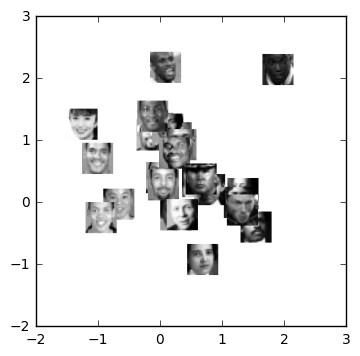

In [96]:
# first 25 faces
index = list(range(0,25))

# normalize scale of "W" locations
coordinates, parameters = ml.transforms.rescale( W[:,0:2])

plt.figure()

plt.hold(True)

for i in index:
    
    # compute location of coordinates
    location = (coordinates[i,0], coordinates[i,0] + 0.5, coordinates[i,1], coordinates[i,1] + 0.5)
    
    img = np.reshape( X[i,:], (24,24))
    
    plt.imshow( img.T, cmap = "gray", extent = location )
    
    plt.axis( (-2,3, -2,3) )
    
plt.show()

